<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/HW7/SidPatel_HW7_clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
pl.style.use('ggplot')
from scipy.cluster.hierarchy import dendrogram, linkage


Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [2]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW7/kidpackgenes.csv",header=None).iloc[:,1:]

In [3]:
genes

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,33.000000,34.000000,35.000000,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,48.000000,49.000000,50.000000,51.000000,52.000000,55.000000,56.000000,57.000000,58.000000,60.000000,61.000000,64.000000,65.000000,66.000000,68.000000,69.000000,72.000000,73.000000,74.000000,75.000000,76.000000,77.000000,78.000000,79.000000,81.000000,83.000000,84.000000,85.000000,86.000000,87.000000
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# 1. explore the data. 

In [4]:
genes = genes.dropna()
genes = genes.drop([0])
genes

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [5]:
scaledgenes = skl.preprocessing.scale(genes,axis=0 ,with_mean=True, with_std=True, copy=True)

In [6]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,
         0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
         0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
         0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0., -0., -0., -0., -0., -0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [7]:
twodproj = skl.manifold.TSNE(n_components=2,perplexity=30,init='random').fit_transform(scaledgenes)

In [8]:
twodproj.shape

(2602, 2)

In [9]:
twodproj

array([[ 11.388063 ,  20.733522 ],
       [ 11.449167 ,  20.610832 ],
       [ 11.443125 ,  -7.0432587],
       ...,
       [ 34.958824 , -13.672334 ],
       [ 27.277    , -31.924274 ],
       [ 16.720531 ,  -7.281687 ]], dtype=float32)

2.3 plot the TSNE projection


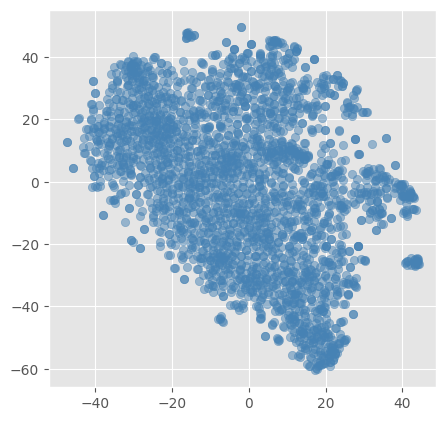

In [10]:
#https://towardsdatascience.com/t-sne-python-example-1ded9953f26
plt.figure(figsize=(5,5),dpi=100)
plt.scatter(x=twodproj[:,0],y=twodproj[:,1],c="steelblue",alpha=0.5)


2.4 calculate a function that measures the intracluster variance (i did it in class)

In [11]:
def calICVar(X,labels, model):
    n_clusters = np.unique(labels).shape[0]
    #print(n_clusters)

    icv = np.zeros(n_clusters)
    
    for i in range(n_clusters):
        
        #X[labels==i] checks that the point is in the correct cluster
        dist = np.sqrt((X[labels==i] - model.cluster_centers_[i])**2) /n_clusters
        icv[i] = ((dist**2).sum() / ((labels == i).sum() - 1)).sum()

        
        
    return icv.sum()

In [12]:
'''
l = []
for i in range(0,10):
    l.append((geneclustersKM.labels_==i).sum())
print(l)
print(sum(l))
'''

'\nl = []\nfor i in range(0,10):\n    l.append((geneclustersKM.labels_==i).sum())\nprint(l)\nprint(sum(l))\n'

In [13]:
def MyicvElbow(X): 
    var = []
    for i in range(1,11):
        kmodel = cluster.KMeans(n_clusters=i).fit(X)
        var.append(calICVar(X,kmodel.labels_,kmodel));
    
    print(var)
    plt.plot(list(range(1,11)),var,'-o')
    plt.xticks(np.arange(1, 11, 1)) #https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
    plt.ylabel("icv")


In [14]:
def inertTEST(X, labels, model):
    n_clusters = np.unique(labels).shape[0]
    #print(n_clusters)

    icv = np.zeros(n_clusters)
    for i in range(n_clusters):
    #X[labels==i] checks that the point is in the correct cluster
        dist = np.sqrt((X[labels==i] - model.cluster_centers_[i])**2)

        icv[i]=(dist**2).sum()

    return icv.sum()

def myElbow(scaledX):
    var = []
    for i in range(1,11):
        kmodel = cluster.KMeans(n_clusters=i).fit(scaledX)
        var.append(inertTEST(scaledX,kmodel.labels_,kmodel));
    
    print(var)
    plt.plot(list(range(1,11)),var,'-o')
    plt.xticks(np.arange(1, 11, 1)) #https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
    plt.ylabel("inertia")



In [15]:
#geneclustersKM.inertia_

In [16]:
#inertTEST(scaledgenes,geneclustersKM.labels_,geneclustersKM)

In [17]:
def sklELBOW(Xscale,nc):
    variances = []
    for i in range(1,nc+1):
        KM = cluster.KMeans(n_clusters=i).fit(Xscale)
        variances.append(KM.inertia_) #https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
                                      #https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
                                      

    pl.plot(list(range(1,nc+1)),variances,'-o')
    pl.ylabel(".inertia_")
    print(variances)
#elbow(scaledgenes,10)

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

[74.02845059592465, 31.795342815993536, 20.771691408552215, 15.524232421350252, 12.168554958253717, 9.86845050862201, 8.260119528341182, 7.002395287580585, 6.072640278396384, 6.111815868877199]


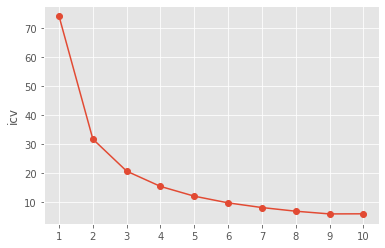

In [18]:
MyicvElbow(scaledgenes)

[192548.00000000003, 154188.9346071788, 140848.08492992615, 133975.72242841363, 127776.34098031116, 123356.3862528704, 120025.16603909852, 117863.00700154339, 115935.09121846916, 113927.38522975869]


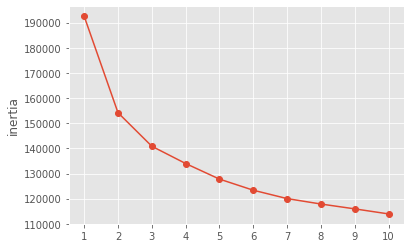

In [19]:
myElbow(scaledgenes)

[192548.0, 154188.9346071788, 140847.91643800022, 133975.72242841366, 127776.34098031114, 123376.48587371447, 120024.77626879724, 117881.86150792813, 115893.40344006511, 114043.15754212273]


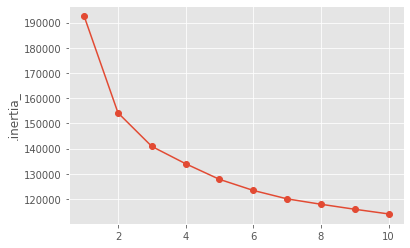

In [20]:
sklELBOW(scaledgenes,10)

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

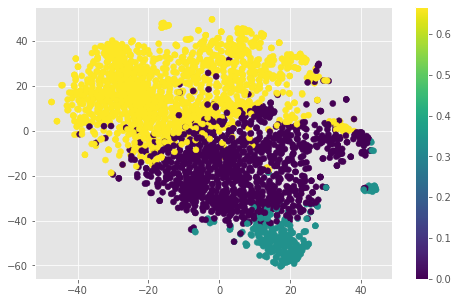

In [50]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.figure(figsize=(8,5))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, alpha=1)
pl.colorbar();


ideally you should be able to isolate the little islands, like the one on the left "at 7 hour". Try to set the starting guess in a way that may facilitate this

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [22]:
#from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
Zw = linkage(scaledgenes, "ward")

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


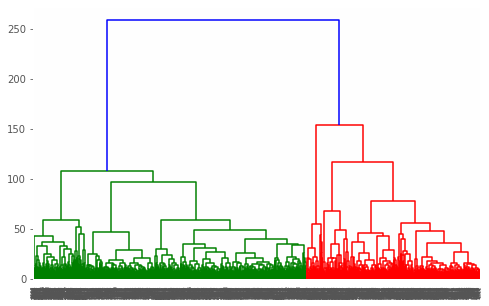

In [24]:
plt.figure(figsize(8,5))
dn = dendrogram(Zw)

4b.3 repeat with a different linkage and comment on differences

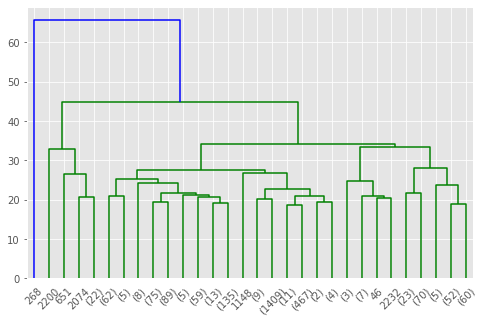

In [34]:
Zc = linkage(scaledgenes, 'complete')
dnc = dendrogram(Zc,truncate_mode='lastp')

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

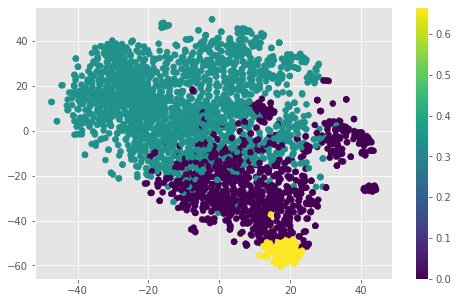

In [51]:
geneclustersAg = cluster.AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward").fit(scaledgenes)
pl.figure(figsize=(8,5))
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_/ geneclustersAg.n_clusters, alpha=1)
pl.colorbar();

In [33]:
geneclustersAg.labels_

array([1, 1, 1, ..., 0, 0, 0])

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative
